In [177]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
from  sklearn.metrics import roc_auc_score,roc_curve,auc

In [2]:
data = pd.read_excel("sportsdata.xlsx",sheet_name="data")

In [3]:
data.head(10)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
5,Game_6,Win,24.0,Night,ODI,3.0,1,4.0,Batting,Srilanka,...,15.0,3,0.0,5,4.0,6.0,0,97.0,3,1
6,Game_7,Loss,24.0,Day and Night,T20,2.0,1,2.0,Batting,Zimbabwe,...,12.0,3,0.0,0,4.0,6.0,0,70.0,3,1
7,Game_8,Win,24.0,Night,ODI,3.0,1,2.0,Batting,Kenya,...,16.0,3,0.0,4,1.0,6.0,0,33.0,3,1
8,Game_9,Loss,24.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
9,Game_10,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1


In [4]:
data.shape

(2930, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [7]:
data.isnull().sum().sum()

789

# Missing value treatment

# 1)Age

In [8]:
print("mean age",data["Avg_team_Age"].mean())
print("mode age",data["Avg_team_Age"].mode())
print("median",data["Avg_team_Age"].median())

mean age 29.242852100247088
mode age 0    30.0
Name: Avg_team_Age, dtype: float64
median 30.0


In [9]:
data["Avg_team_Age"] = data["Avg_team_Age"].fillna(data["Avg_team_Age"].median())

# 2) Match type

In [10]:
pd.value_counts(data["Match_light_type"])

Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64

In [11]:
data["Match_light_type"] = data["Match_light_type"].fillna("NaN")

In [12]:
pd.value_counts(data["Match_light_type"])

Day              2041
Day and Night     541
Night             296
NaN                52
Name: Match_light_type, dtype: int64

# 4)Bowler in match

In [13]:
bowl=data["Bowlers_in_team"].mode()

In [14]:
data["Bowlers_in_team"]= data["Bowlers_in_team"].fillna(3.0)

In [15]:
pd.value_counts(data["Bowlers_in_team"])

3.0    1187
4.0     775
2.0     547
1.0     329
5.0      92
Name: Bowlers_in_team, dtype: int64

# 5) All_rounder_in_team

In [16]:
pd.value_counts(data["All_rounder_in_team"])

3.0    892
4.0    877
2.0    563
1.0    558
Name: All_rounder_in_team, dtype: int64

In [17]:
data["All_rounder_in_team"].median()

3.0

In [18]:
data["All_rounder_in_team"] = data["All_rounder_in_team"].fillna(3.0)

In [19]:
pd.value_counts(data["All_rounder_in_team"])

3.0    932
4.0    877
2.0    563
1.0    558
Name: All_rounder_in_team, dtype: int64

# 6) First_selection

In [20]:
data["First_selection"].mode()

0    Bowling
Name: First_selection, dtype: object

In [21]:
data["First_selection"] = data["First_selection"].fillna("Bowling")

In [22]:
pd.value_counts(data["First_selection"])

Bowling    1781
Batting    1149
Name: First_selection, dtype: int64

# 9) Audience_number

In [23]:
data["Audience_number"].mean()

46267.96068796069

In [24]:
data["Audience_number"] = data["Audience_number"].fillna(46268)

# 10)Offshore

In [25]:
data["Offshore"] = data["Offshore"].dropna

# 11)Max_run_scored_1over

In [26]:
data["Max_run_scored_1over"].median()

14.0

In [27]:
data["Max_run_scored_1over"] = data["Max_run_scored_1over"].fillna(14.0)

In [28]:
data["Max_run_scored_1over"].mean()

15.18839590443686

# 12) Extra_bowls_bowled

In [29]:
data["Extra_bowls_bowled"].median()

10.0

In [30]:
data["Extra_bowls_bowled"] = data["Extra_bowls_bowled"].fillna(10.0)

# 13) Min_run_scored_1over

In [31]:
data["Min_run_scored_1over"].median() 

3.0

In [32]:
data["Min_run_scored_1over"].mode() 

0    3.0
Name: Min_run_scored_1over, dtype: float64

In [33]:
data["Min_run_scored_1over"].mean() 

2.7626593179469516

In [34]:
data["Min_run_scored_1over"] = data["Min_run_scored_1over"].fillna(3.0)

# 14) Max_run_given_1over

In [35]:
data["Max_run_given_1over"].mean()

8.669198895027625

In [36]:
data["Max_run_given_1over"].median()

6.0

In [37]:
data["Max_run_given_1over"].mode()

0    6.0
Name: Max_run_given_1over, dtype: float64

In [38]:
data["Max_run_given_1over"] = data["Max_run_given_1over"].fillna(6)

# 15) player_highest_run

In [39]:
data["player_highest_run"].mean()

65.8893866299104

In [40]:
data["player_highest_run"].mode()

0    66.0
Name: player_highest_run, dtype: float64

In [41]:
data["player_highest_run"]= data["player_highest_run"].fillna(66.0)

In [42]:
data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type           0
Match_format              70
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection            0
Opponent                  36
Season                    62
Audience_number            0
Offshore                   0
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [43]:
data= data.dropna()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2762 non-null   object 
 1   Result                  2762 non-null   object 
 2   Avg_team_Age            2762 non-null   float64
 3   Match_light_type        2762 non-null   object 
 4   Match_format            2762 non-null   object 
 5   Bowlers_in_team         2762 non-null   float64
 6   Wicket_keeper_in_team   2762 non-null   int64  
 7   All_rounder_in_team     2762 non-null   float64
 8   First_selection         2762 non-null   object 
 9   Opponent                2762 non-null   object 
 10  Season                  2762 non-null   object 
 11  Audience_number         2762 non-null   float64
 12  Offshore                2762 non-null   object 
 13  Max_run_scored_1over    2762 non-null   float64
 14  Max_wicket_taken_1over  2762 non-null   

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2762.0,29.254526,2.271030,12.0,30.00,30.0,30.00,70.0
Bowlers_in_team,2762.0,2.911296,1.007625,1.0,2.00,3.0,4.00,5.0
Wicket_keeper_in_team,2762.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
All_rounder_in_team,2762.0,2.730630,1.084210,1.0,2.00,3.0,4.00,4.0
Audience_number,2762.0,46361.649167,48784.862033,7063.0,20546.75,35147.0,55931.75,1399930.0
Max_run_scored_1over,2762.0,15.196959,3.665518,11.0,12.00,14.0,18.00,25.0
Max_wicket_taken_1over,2762.0,2.713975,1.082280,1.0,2.00,3.0,4.00,4.0
Extra_bowls_bowled,2762.0,11.239319,7.791813,0.0,6.00,10.0,15.00,40.0
Min_run_given_1over,2762.0,1.925778,1.680338,0.0,0.00,2.0,3.00,6.0
Min_run_scored_1over,2762.0,2.763577,0.703542,1.0,2.00,3.0,3.00,4.0


# feature engineering

for i in data.columns:
    if data[i].dtype =="object":
        data[i] = pd.Categorical(data[i]).codes
    

# Univariate analysis

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

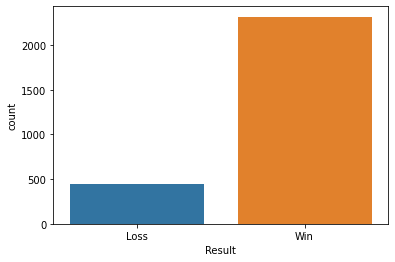

In [46]:
sas.countplot(data["Result"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_format', ylabel='count'>

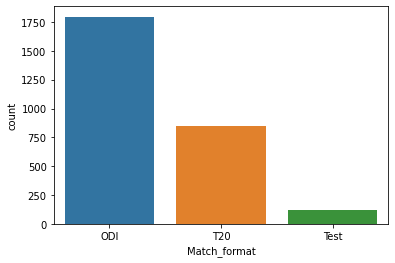

In [47]:
sas.countplot(data["Match_format"])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Opponent', ylabel='count'>

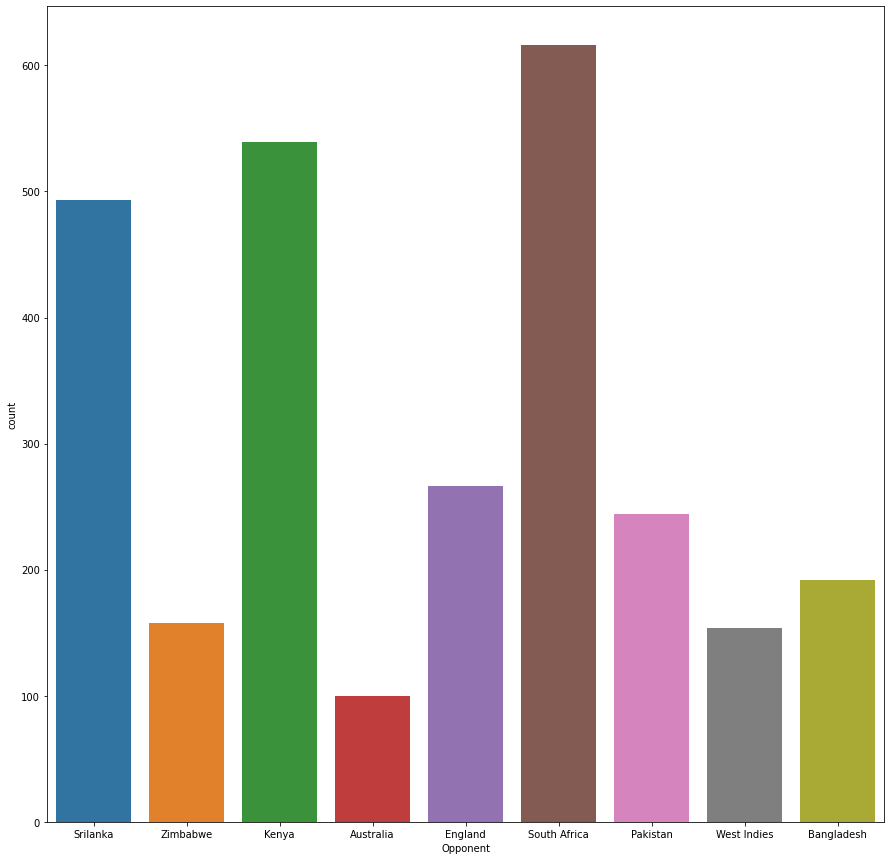

In [48]:
plt.figure(figsize=(15,15))

sas.countplot(data["Opponent"] )


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

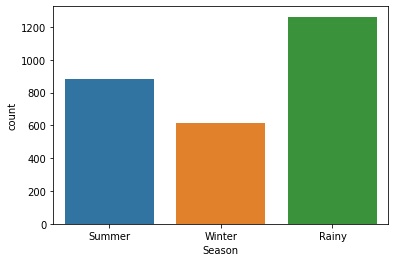

In [49]:
sas.countplot(data["Season"])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_light_type', ylabel='count'>

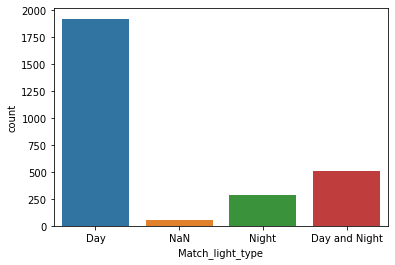

In [50]:
sas.countplot(data["Match_light_type"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='First_selection', ylabel='count'>

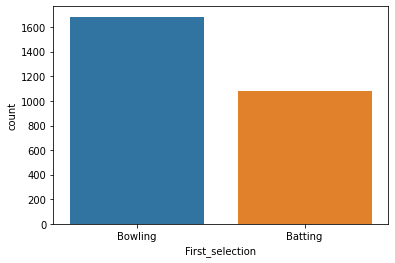

In [51]:
sas.countplot(data["First_selection"])

<AxesSubplot:xlabel='Avg_team_Age', ylabel='Count'>

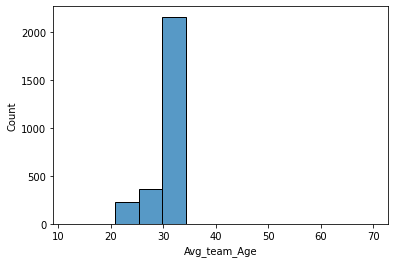

In [52]:
sas.histplot(data["Avg_team_Age"])

In [53]:
data["Avg_team_Age"].mode()

0    30.0
Name: Avg_team_Age, dtype: float64

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bowlers_in_team', ylabel='count'>

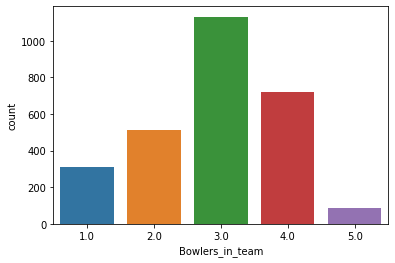

In [54]:
sas.countplot(data["Bowlers_in_team"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_rounder_in_team', ylabel='count'>

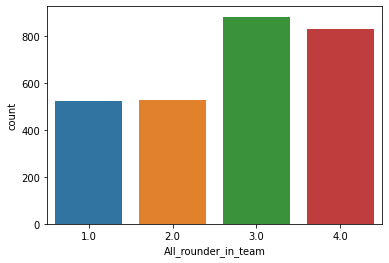

In [55]:
sas.countplot(data["All_rounder_in_team"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_bowls_opponent', ylabel='count'>

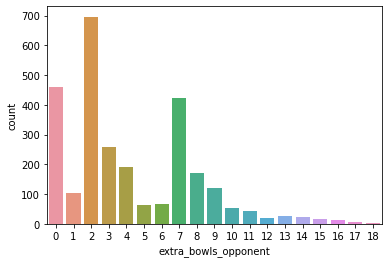

In [56]:
sas.countplot(data["extra_bowls_opponent"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Players_scored_zero', ylabel='count'>

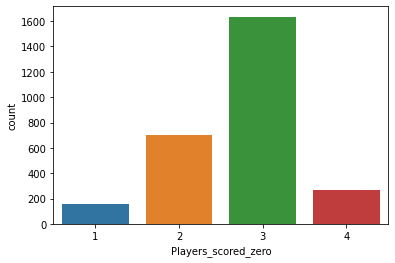

In [57]:
sas.countplot(data["Players_scored_zero"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_highest_wicket', ylabel='count'>

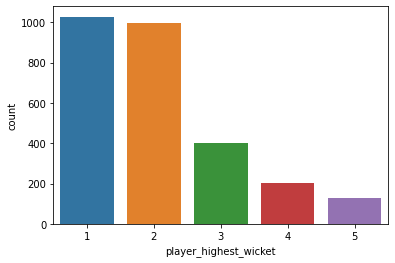

In [58]:
sas.countplot(data["player_highest_wicket"])

#     Bi variate analysis
    


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_format', ylabel='Bowlers_in_team'>

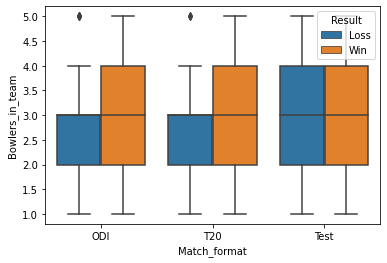

In [59]:
sas.boxplot(data["Match_format"],data["Bowlers_in_team"], hue = data["Result"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_format', ylabel='Max_wicket_taken_1over'>

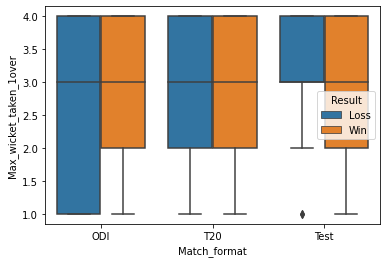

In [60]:
sas.boxplot(data["Match_format"],data["Max_wicket_taken_1over"], hue = data["Result"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_format', ylabel='player_highest_run'>

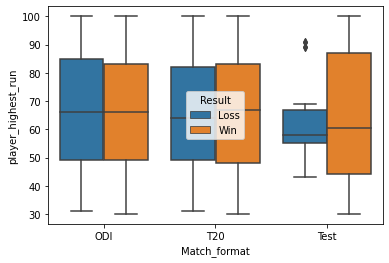

In [61]:
sas.boxplot(data["Match_format"],data["player_highest_run"], hue = data["Result"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_team_Age', ylabel='Result'>

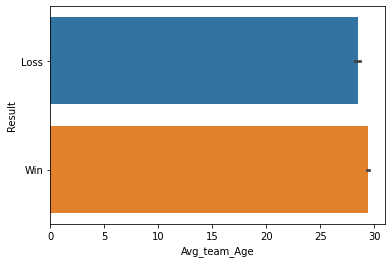

In [62]:
sas.barplot(data["Avg_team_Age"], data["Result"])

# correlation

<ipython-input-63-e5d2def61a07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sas.heatmap(data.corr(),annot = True,fmt = '.2f', cmap='coolwarm')


<AxesSubplot:>

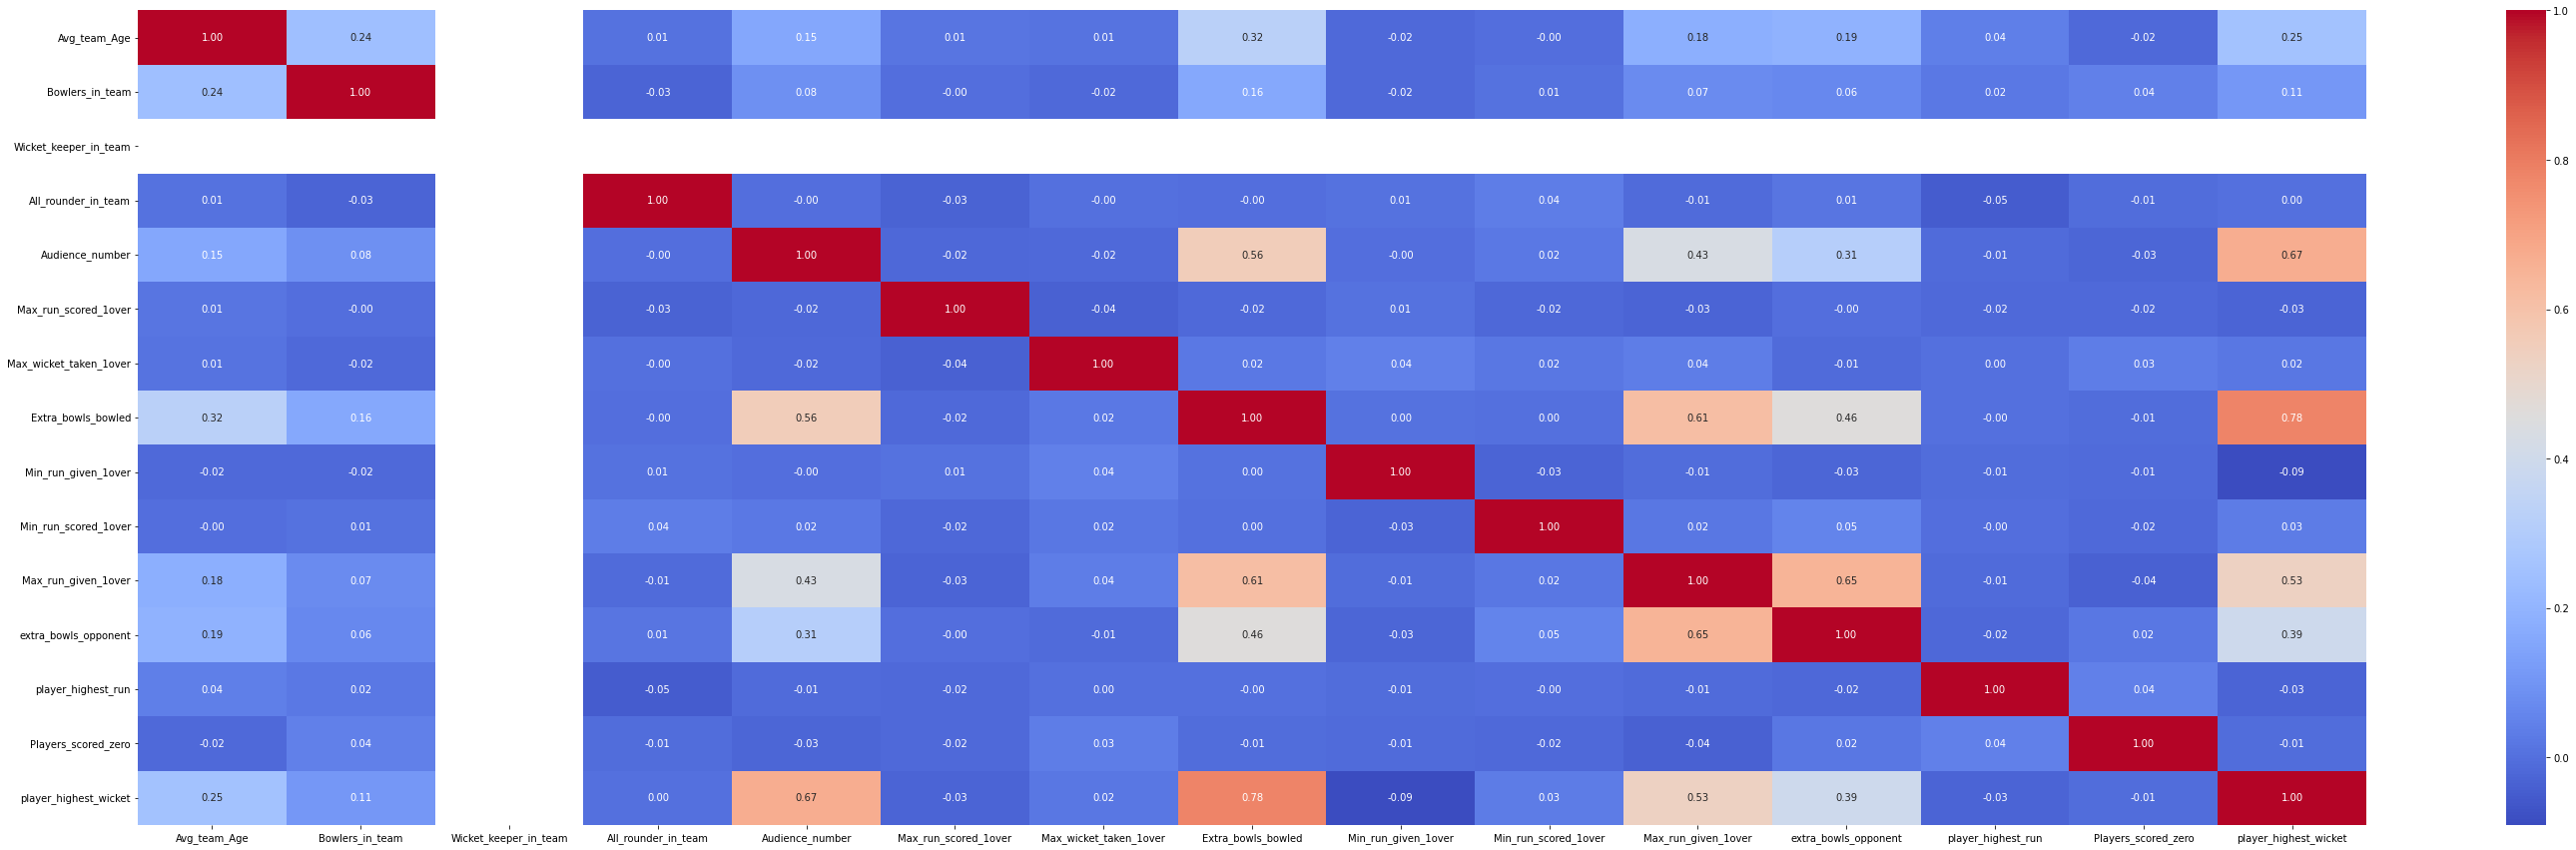

In [63]:
plt.figure(figsize =(50,15))
sas.heatmap(data.corr(),annot = True,fmt = '.2f', cmap='coolwarm')

In [64]:
data.shape

(2762, 23)

# variable transformation

In [65]:
for i in data.columns:
    if data[i].dtype == "object":
        data[i]= pd.Categorical(data[i]).codes
    

<AxesSubplot:>

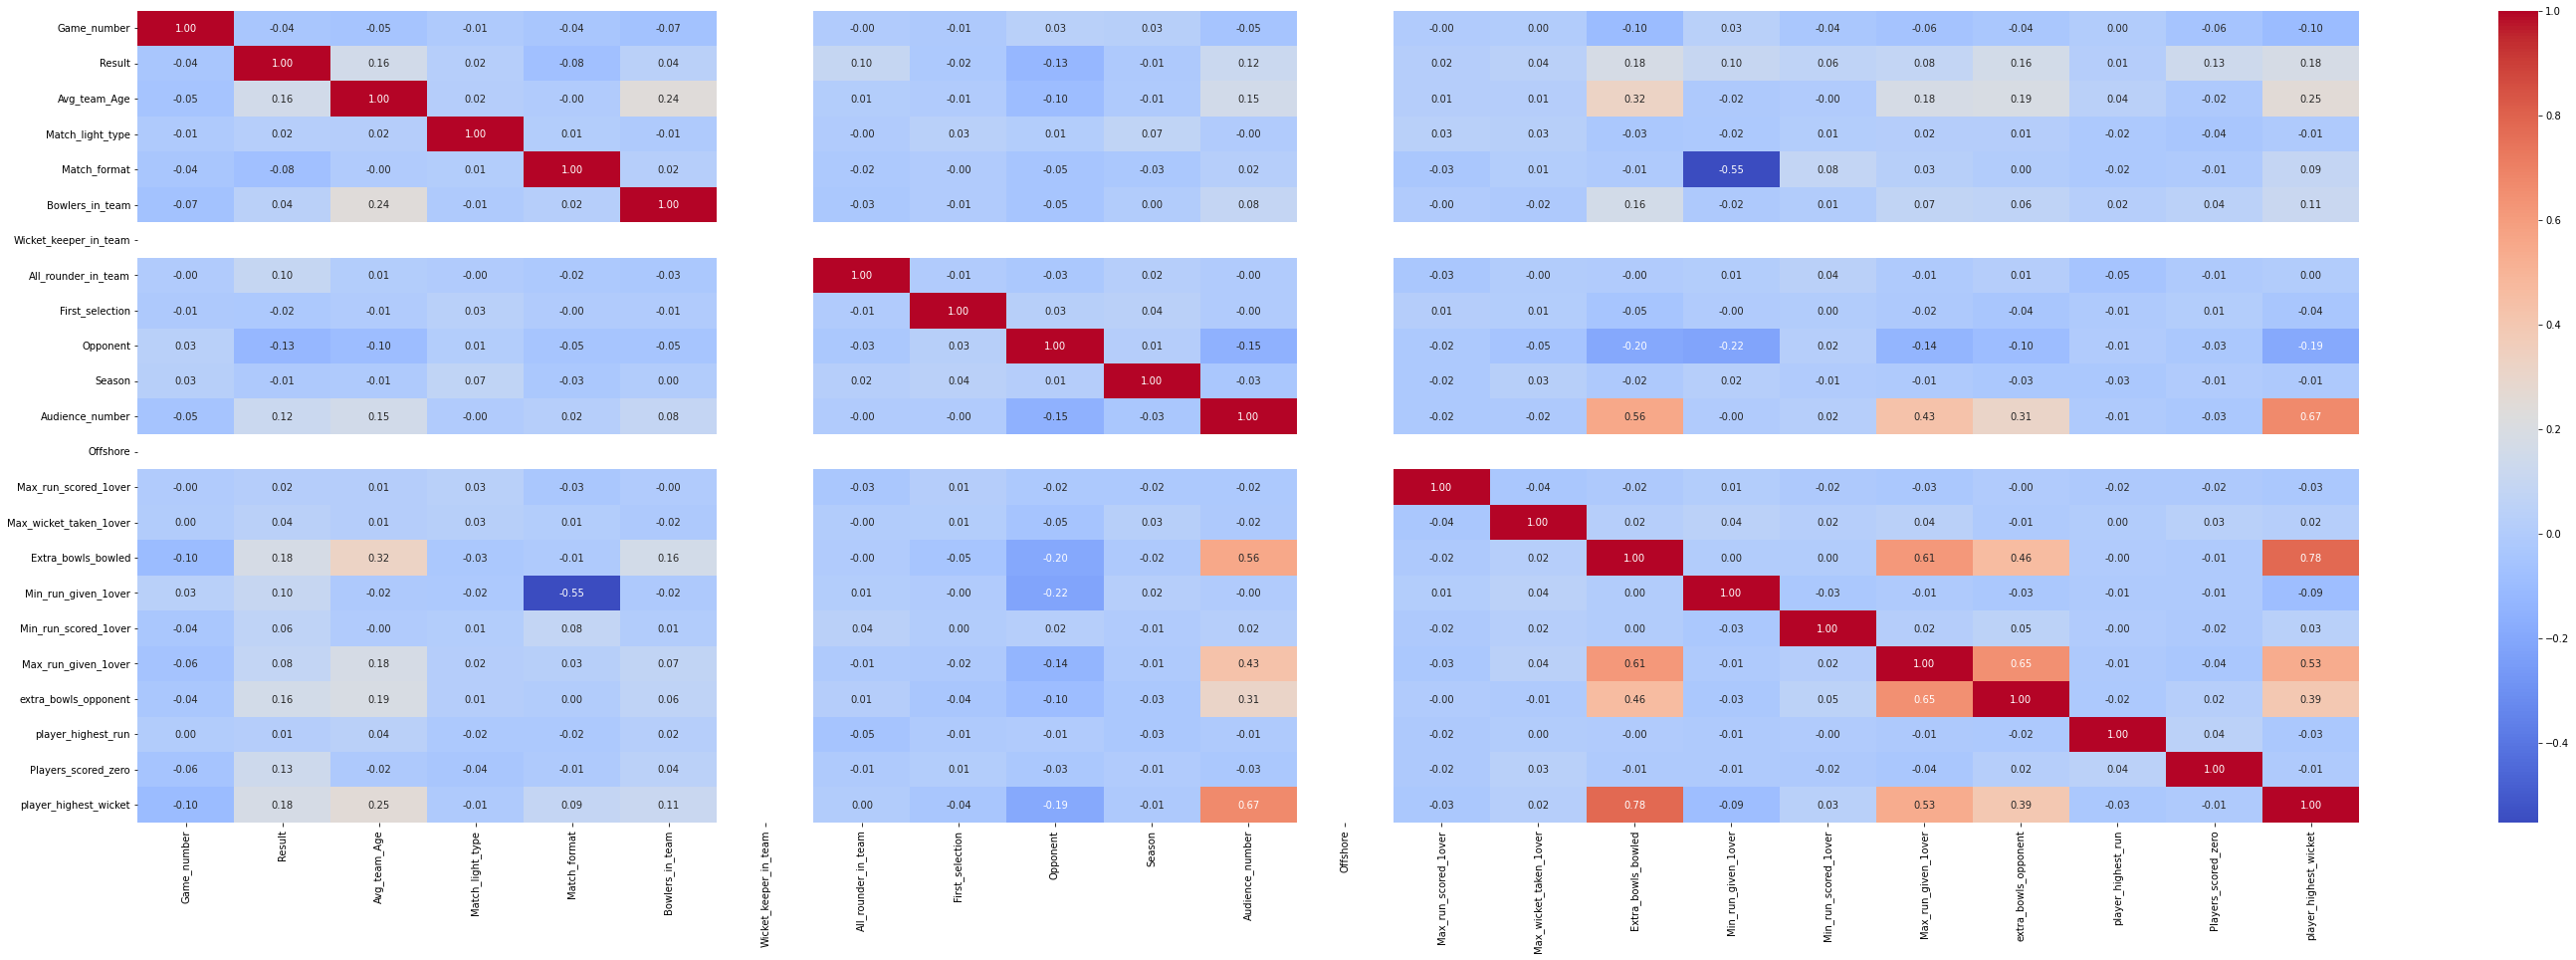

In [66]:
plt.figure(figsize =(50,15))
sas.heatmap(data.corr(),annot = True,fmt = '.2f', cmap='coolwarm')

# removal of unwanted columns

In [67]:
data= data.drop(["Wicket_keeper_in_team","Game_number","Offshore","Audience_number"],axis = 1)

In [68]:
data.shape

(2762, 19)

In [69]:
29

29

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 0 to 2929
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2762 non-null   int8   
 1   Avg_team_Age            2762 non-null   float64
 2   Match_light_type        2762 non-null   int8   
 3   Match_format            2762 non-null   int8   
 4   Bowlers_in_team         2762 non-null   float64
 5   All_rounder_in_team     2762 non-null   float64
 6   First_selection         2762 non-null   int8   
 7   Opponent                2762 non-null   int8   
 8   Season                  2762 non-null   int8   
 9   Max_run_scored_1over    2762 non-null   float64
 10  Max_wicket_taken_1over  2762 non-null   int64  
 11  Extra_bowls_bowled      2762 non-null   float64
 12  Min_run_given_1over     2762 non-null   int64  
 13  Min_run_scored_1over    2762 non-null   float64
 14  Max_run_given_1over     2762 non-null   

# Data split

In [71]:
x = data.drop(["Result"],axis =1)
y = data["Result"]

In [72]:
x

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,18.0,0,0,3.0,3.0,1,6,1,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,24.0,0,1,3.0,4.0,0,8,1,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
3,24.0,2,0,2.0,2.0,1,3,1,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,24.0,3,0,1.0,3.0,1,6,1,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
5,24.0,3,0,3.0,4.0,0,6,1,15.0,3,0.0,5,4.0,6.0,0,97.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,30.0,0,1,3.0,4.0,0,5,1,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,30.0,0,0,4.0,3.0,1,3,1,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,30.0,1,0,4.0,3.0,1,4,0,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,30.0,0,0,4.0,3.0,0,3,0,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1


In [73]:
y.shape

(2762,)

# Train test split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=.30)

# Model building

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()

In [78]:
lr.fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_pred1 = lr.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test,y_predict)

0.8552472858866104

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
confusion_matrix(y_test,y_predict)

array([[  8, 111],
       [  9, 701]], dtype=int64)

In [85]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.47      0.07      0.12       119
           1       0.86      0.99      0.92       710

    accuracy                           0.86       829
   macro avg       0.67      0.53      0.52       829
weighted avg       0.81      0.86      0.81       829



<AxesSubplot:>

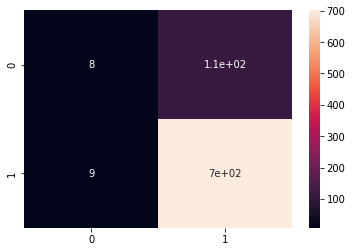

In [105]:
sas.heatmap(confusion_matrix(y_test,y_pred1),annot = True)

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
drt = DecisionTreeClassifier()

In [88]:
drt.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = drt.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred)

0.902291917973462

In [106]:
confusion_matrix(y_test,y_pred)

array([[ 87,  32],
       [ 49, 661]], dtype=int64)

In [91]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       119
           1       0.95      0.93      0.94       710

    accuracy                           0.90       829
   macro avg       0.80      0.83      0.81       829
weighted avg       0.91      0.90      0.90       829



<AxesSubplot:>

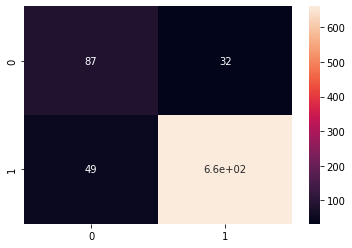

In [100]:
sas.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [102]:
confusion_matrix(y_test,y_pred)

array([[ 87,  32],
       [ 49, 661]], dtype=int64)

In [110]:
# to find imp feature in data set
print(pd.DataFrame(drt.feature_importances_,columns = [ "Imp"], index = x_train.columns))

                             Imp
Avg_team_Age            0.024795
Match_light_type        0.025863
Match_format            0.002244
Bowlers_in_team         0.025793
All_rounder_in_team     0.062491
First_selection         0.013318
Opponent                0.050757
Season                  0.048271
Max_run_scored_1over    0.110151
Max_wicket_taken_1over  0.067493
Extra_bowls_bowled      0.111958
Min_run_given_1over     0.044766
Min_run_scored_1over    0.064998
Max_run_given_1over     0.022629
extra_bowls_opponent    0.056641
player_highest_run      0.160665
Players_scored_zero     0.073594
player_highest_wicket   0.033572


# Lda

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [120]:
lda = LinearDiscriminantAnalysis()

In [121]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [116]:
y1_pred = lda.predict(x_test)

In [117]:
accuracy_score(y_test,y1_pred)

0.8673100120627262

In [118]:
 confusion_matrix(y_test,y1_pred)

array([[ 22,  97],
       [ 13, 697]], dtype=int64)

In [119]:
print(classification_report(y_test , y1_pred))

              precision    recall  f1-score   support

           0       0.63      0.18      0.29       119
           1       0.88      0.98      0.93       710

    accuracy                           0.87       829
   macro avg       0.75      0.58      0.61       829
weighted avg       0.84      0.87      0.83       829



<AxesSubplot:>

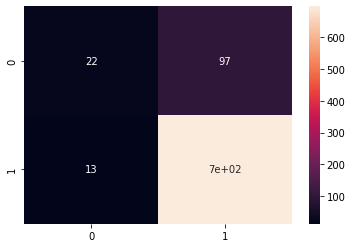

In [168]:
sas.heatmap(confusion_matrix(y_test,y1_pred),annot = True)

# Random forest


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [133]:
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [11],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [134]:
y2_pred = grid_search_rf.predict(x_test)

In [135]:
accuracy_score(y_test,y2_pred)

0.8673100120627262

In [136]:
print(classification_report(y_test , y2_pred))

              precision    recall  f1-score   support

           0       0.68      0.14      0.24       119
           1       0.87      0.99      0.93       710

    accuracy                           0.87       829
   macro avg       0.78      0.57      0.58       829
weighted avg       0.85      0.87      0.83       829



In [137]:
 confusion_matrix(y_test,y1_pred)

array([[ 22,  97],
       [ 13, 697]], dtype=int64)

# KNN/

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
KNN_model=KNeighborsClassifier(n_neighbors = 15,
                              weights = 'uniform',
                              metric = 'minkowski')
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [142]:
y3_pred = KNN_model.predict(x_test)


In [143]:
accuracy_score(y_test,y3_pred)

0.8492159227985525

In [146]:
confusion_matrix(y_test,y3_pred)

array([[  8, 111],
       [ 14, 696]], dtype=int64)

In [147]:
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.36      0.07      0.11       119
           1       0.86      0.98      0.92       710

    accuracy                           0.85       829
   macro avg       0.61      0.52      0.52       829
weighted avg       0.79      0.85      0.80       829



# Gaussian Naive

In [149]:
from sklearn.naive_bayes import GaussianNB

In [150]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [155]:
y4_pred= NB_model.predict(x_test)
accuracy_score(y_test, y4_pred)


0.8021712907117008

In [156]:
print(classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

           0       0.34      0.42      0.38       119
           1       0.90      0.87      0.88       710

    accuracy                           0.80       829
   macro avg       0.62      0.64      0.63       829
weighted avg       0.82      0.80      0.81       829



In [157]:
confusion_matrix(y_test,y4_pred)

array([[ 50,  69],
       [ 95, 615]], dtype=int64)

# gradient boosting

In [160]:
from xgboost import XGBClassifier

In [159]:
pip install  xgboost

     ---------------------------------------- 89.1/89.1 MB 1.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [163]:
xgb = XGBClassifier(base_score = 0.5, 
                    colsample_bylevel = 1, 
                    colsample_bytree = 1,
                    gamma = 0, 
                    learning_rate = 0.1, 
                    max_depth = 10,
                    min_child_weight = 1, 
                    n_estimators = 100, 
                    objective ='binary:logistic', 
                    reg_alpha = 1, 
                    reg_lambda = 1,
                    scale_pos_weight=1,  
                    subsample = 1)
xgb = xgb.fit(x_train, y_train)

In [164]:
y5_pred = xgb.predict(x_test)

In [165]:
accuracy_score(y_test,y5_pred)

0.9445114595898673

In [166]:
confusion_matrix(y_test,y5_pred)

array([[ 82,  37],
       [  9, 701]], dtype=int64)

In [167]:
confusion_matrix(y_test,y5_pred)

array([[ 82,  37],
       [  9, 701]], dtype=int64)

In [169]:
print(classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       119
           1       0.95      0.99      0.97       710

    accuracy                           0.94       829
   macro avg       0.93      0.84      0.87       829
weighted avg       0.94      0.94      0.94       829

